In [5]:
import urllib.request
import os
import tarfile  
from keras.datasets import imdb
from keras.preprocessing import sequence 
from keras.preprocessing.text import Tokenizer 
import re
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
import pandas as pd
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import  linear_model
from sklearn.linear_model import LinearRegression
from sklearn import  linear_model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from scipy.stats import laplace
from math import log
from random import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import binarize
import itertools
import random
from scipy.optimize import minimize
import csv
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import operator
from random import seed
from random import randrange
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import log_loss

In [6]:
data_train = pd.read_csv('labeledTrainData.tsv', sep='\t')
data_train.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [7]:
vocabulary_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)

print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))
 

Loaded dataset with 25000 training samples, 25000 test samples


In [66]:
X_train.shape

(25000, 500)

In [68]:
print('---review---')
print(X_train[6])
print('---label---')
print(y_train[6])

---review---
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

In [10]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in X_train[6]])
print('---label---')
print(y_train[6])

---review with words---
['the', 'and', 'full', 'involving', 'to', 'impressive', 'boring', 'this', 'as', 'and', 'and', 'br', 'villain', 'and', 'and', 'need', 'has', 'of', 'costumes', 'b', 'message', 'to', 'may', 'of', 'props', 'this', 'and', 'and', 'concept', 'issue', 'and', 'to', "god's", 'he', 'is', 'and', 'unfolds', 'movie', 'women', 'like', "isn't", 'surely', "i'm", 'and', 'to', 'toward', 'in', "here's", 'for', 'from', 'did', 'having', 'because', 'very', 'quality', 'it', 'is', 'and', 'and', 'really', 'book', 'is', 'both', 'too', 'worked', 'carl', 'of', 'and', 'br', 'of', 'reviewer', 'closer', 'figure', 'really', 'there', 'will', 'and', 'things', 'is', 'far', 'this', 'make', 'mistakes', 'and', 'was', "couldn't", 'of', 'few', 'br', 'of', 'you', 'to', "don't", 'female', 'than', 'place', 'she', 'to', 'was', 'between', 'that', 'nothing', 'and', 'movies', 'get', 'are', 'and', 'br', 'yes', 'female', 'just', 'its', 'because', 'many', 'br', 'of', 'overly', 'to', 'descent', 'people', 'time', 

In [11]:
word2id

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [12]:
print('Maximumreview length: {}'.format(
    len(max((X_train+ X_test), key=len))))
print('Minimum review length: {}'.format(
len(min((X_test + X_test), key=len))))

Maximumreview length: 2697
Minimum review length: 14


In [13]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [14]:
embedding_size=32
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())


Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
batch_size = 64
num_epochs = 3
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
        X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), 
        batch_size= batch_size, epochs=num_epochs)

Instructions for updating:
Use tf.cast instead.
Train on 24936 samples, validate on 64 samples
Epoch 1/3
24936/24936 [==============================] - 103s 4ms/step - loss: 0.4715 - accuracy: 0.7695 - val_loss: 0.3348 - val_accuracy: 0.8906
Epoch 2/3
24936/24936 [==============================] - 103s 4ms/step - loss: 0.3238 - accuracy: 0.8655 - val_loss: 0.2621 - val_accuracy: 0.9219
Epoch 3/3
24936/24936 [==============================] - 106s 4ms/step - loss: 0.2651 - accuracy: 0.8961 - val_loss: 0.2343 - val_accuracy: 0.9062


In [69]:
scores =model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])
socres

Test accuracy: 0.8664399981498718


NameError: name 'socres' is not defined

## Logistics regression

In [18]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/Users/pan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
X_train.shape

(25000, 500)

In [19]:
Predictions = logmodel.predict(X_test)
Predictions

array([0, 1, 1, ..., 1, 0, 0])

In [28]:
print("Accuracy metric in the testing dataset:",metrics.accuracy_score(y_test, Predictions))

Accuracy metric in the testing dataset: 0.5088


In [27]:
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

           0       0.51      0.57      0.54     12500
           1       0.51      0.45      0.48     12500

    accuracy                           0.51     25000
   macro avg       0.51      0.51      0.51     25000
weighted avg       0.51      0.51      0.51     25000



In [22]:
def sigmoid(z):
    
    return 1 / (1 + np.exp(-z))

class LogisticClassifier:
    
    def __init__(self, learning_rate=0.1, tolerance=1e-4, max_iter=1000):
        # gradient descent parameters
        self.learning_rate = float(learning_rate)
        self.tolerance = float(tolerance)
        self.max_iter = int(max_iter)
        
        # how to construct a the design matrix
        self.add_intercept = True
        self.center = True
        self.scale = True
        
        self.training_loss_history = []

    def _design_matrix(self, X):
        if self.center:
            X = X - self.means
        if self.scale:
            X = X / self.standard_error
        if self.add_intercept:
            X = np.hstack([ np.ones((X.shape[0], 1)), X])
            
        return X
    
    def fit_center_scale(self, X):
        self.means = X.mean(axis=0)
        self.standard_error = np.std(X, axis=0)
    
    def fit(self, X, y):
        self.fit_center_scale(X)
        
        # add intercept column to the design matrix
        n, k = X.shape
        X = self._design_matrix(X)
        
        # used for the convergence check
        previous_loss = -float('inf')
        self.converged = False
        
        # initialize parameters
        self.beta = np.zeros(k + (1 if self.add_intercept else 0))
        
        for i in range(self.max_iter):
            y_hat = sigmoid(X @ self.beta)
            self.loss = np.mean(-y * np.log(y_hat) - (1-y) * np.log(1-y_hat))

            # convergence check
            if abs(previous_loss - self.loss) < self.tolerance:
                self.converged = True
                break
            else:
                previous_loss = self.loss

            # gradient descent
            residuals = (y_hat - y).reshape( (n, 1) )
            gradient = (X * residuals).mean(axis=0)
            self.beta -= self.learning_rate * gradient
        
        self.iterations = i+1
        
    def predict_proba(self, X):
        # add intercept column to the design matrix
        X = self._design_matrix(X)
        return sigmoid(X @ self.beta)   
        
    def predict(self, X):
        return (self.predict_proba(X) > 0.5).astype(int)

In [23]:
model_1 = LogisticClassifier(learning_rate=0.0001,tolerance=1e-5, max_iter=5000)
%time model_1.fit(X_train, y_train)
model_1.converged, model_1.iterations, model_1.loss

CPU times: user 1.48 s, sys: 104 ms, total: 1.58 s
Wall time: 308 ms


(True, 2, 0.6931453286832879)

In [24]:
p_hat = model_1.predict_proba(X_test)
y_hat = model_1.predict(X_test)
accuracy_score(y_test, y_hat)

0.50288

In [25]:
print('Cross Entropy Loss:',log_loss(y_test, y_hat))

Cross Entropy Loss: 17.170019541570902


In [26]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.50      0.74      0.60     12500
           1       0.51      0.26      0.35     12500

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.47     25000
weighted avg       0.50      0.50      0.47     25000



## LDA

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.model_selection import cross_validate
lda = LinearDiscriminantAnalysis()

In [35]:
lda.fit(X_train, y_train)  

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [37]:
lda_pred = lda.predict(X_test) 
lda_pred_train = lda.predict(X_train) 

In [38]:
cm_lda = confusion_matrix (y_test, lda_pred)
cm_lda

array([[7089, 5411],
       [6862, 5638]])

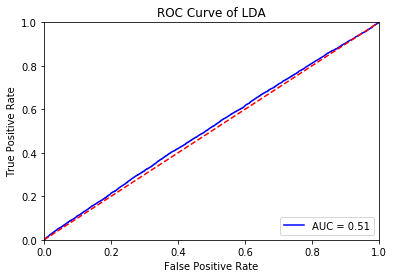

In [39]:
lda_scores = lda.predict_proba(X_test)
lda_fpr, lda_tpr, threshold = roc_curve(y_test, lda_scores[:, 1])
lda_roc_auc = auc(lda_fpr, lda_tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(lda_fpr, lda_tpr,'b', label = 'AUC = %0.2f' % lda_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of LDA')
plt.show()

In [40]:
print("Accuracy metric in the testing dataset: "
      , (cm_lda[1,1]+cm_lda[0,0])/(cm_lda[1,0]+cm_lda[1,1]+cm_lda[0,0]+cm_lda[0,1])) #Accuracy
print("Accuracy metric in the training dataset:",metrics.accuracy_score(y_train, lda_pred_train))

print ('Error on train set: ', 1- metrics.accuracy_score(y_train, lda_pred_train))
print ('Error on test set: ', 1- metrics.accuracy_score(y_test, lda_pred))

Accuracy metric in the testing dataset:  0.50908
Accuracy metric in the training dataset: 0.55192
Error on train set:  0.44808000000000003
Error on test set:  0.49092


## Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB 
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_pred_train = nb.predict(X_train)

In [42]:
nb_scores = nb.predict_proba(X_test)
nb_fpr, nb_tpr, nb_threshold = roc_curve(y_test, nb_scores[:, 1])
nb_roc_auc = auc(nb_fpr, nb_tpr)

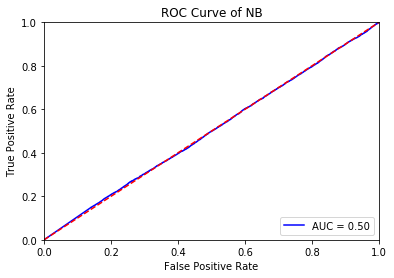

In [43]:
plt.title('Receiver Operating Characteristic')
plt.plot(nb_fpr, nb_tpr, 'b', label = 'AUC = %0.2f' % nb_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of NB')
plt.show()

In [44]:
print("Accuracy on test:",metrics.accuracy_score(y_test, nb_pred))
print("Accuracy on train:",metrics.accuracy_score(y_train, nb_pred_train))

print ('Error on train set: ', 1- metrics.accuracy_score(y_train, nb_pred_train))
print ('Error on test set: ', 1- metrics.accuracy_score(y_test, nb_pred))

Accuracy on test: 0.50416
Accuracy on train: 0.5144
Error on train set:  0.48560000000000003
Error on test set:  0.49583999999999995


## Decision Tree

In [29]:
from sklearn import tree
treeee = tree.DecisionTreeClassifier()
treeee = treeee.fit(X_train, y_train)
dt_pred = treeee.predict(X_test)
dt_pred_train =  treeee.predict(X_train)

In [30]:
dt_scores = treeee.predict_proba(X_test)
dt_fpr, dt_tpr, dt_threshold = roc_curve(y_test, dt_scores[:, 1])
dt_roc_auc = auc(dt_fpr, dt_tpr)

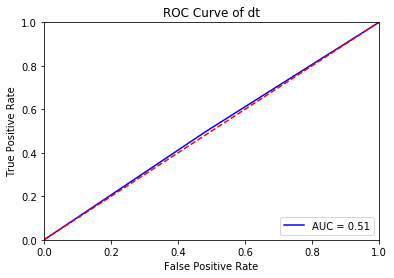

In [31]:
plt.title('Receiver Operating Characteristic')
plt.plot(dt_fpr, dt_tpr, 'b', label = 'AUC = %0.2f' % dt_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of dt')
plt.show()

In [32]:
print("Accuracy on test:",metrics.accuracy_score(y_test, dt_pred))
print("Accuracy on train:",metrics.accuracy_score(y_train, dt_pred_train))

print ('Error on train set: ', 1- metrics.accuracy_score(y_train, dt_pred_train))
print ('Error on test set: ', 1- metrics.accuracy_score(y_test, dt_pred))

Accuracy on test: 0.5074
Accuracy on train: 1.0
Error on train set:  0.0
Error on test set:  0.49260000000000004
